<a href="https://colab.research.google.com/github/records-sa/Python/blob/main/Colab_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas-datareader finance-datareader

In [ ]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

import numpy as np
import pandas as pd

import FinanceDataReader as fdr


<Axes: xlabel='Date'>

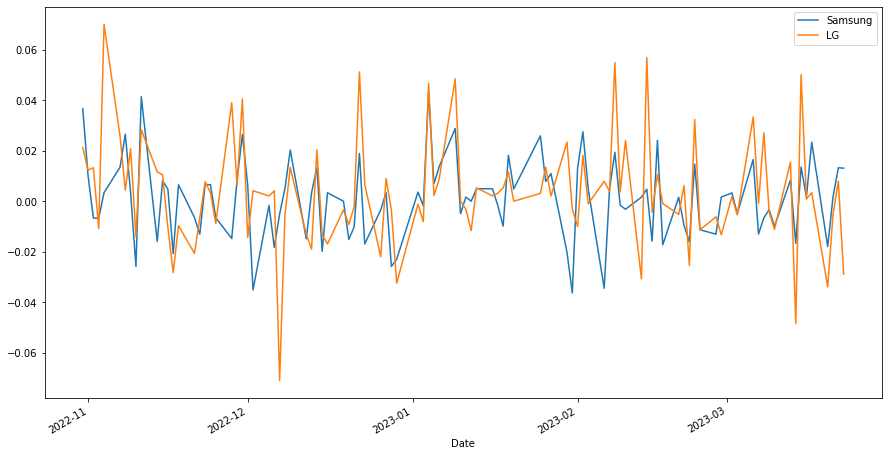

In [14]:
df_1 = fdr.DataReader('005930','2018')
df_2 = fdr.DataReader('066570','2018')

df = pd.DataFrame()
df['Samsung'] = df_1['Change']
df['LG'] = df_2['Change']

df.tail(100).plot(figsize=[15,8])

In [42]:
def get_return(code, n):
  df = fdr.DataReader(code,'2018')

  df = df[['Close']].copy()

  df['ma'] = df.rolling(n).mean().shift(1)

  df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

  df.iloc[-1, -1] = 'sell'

  cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
  cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

  df_buy = df[cond1].reset_index()
  df_buy.columns = ['날짜','종가(buy)','이평값','액션']

  df_sell = df[cond2].reset_index()
  df_sell.columns = ['날짜','종가(sell)','이평값','액션']

  df_result = pd.concat([df_buy, df_sell], axis=1)

  df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)']

  return df_result[['수익률']].cumprod().iloc[-1,-1] - 1

In [57]:
def get_return_sl(code, short, long):

  df = fdr.DataReader(code,'2018')

  df = df[['Close']].copy()

  df['ma1'] = df['Close'].rolling(short).mean().shift(1)
  df['ma2'] = df['Close'].rolling(long).mean().shift(1)

  df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

  df.iloc[-1, -1] = 'sell'

  cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
  cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

  df_buy = df[cond1].reset_index()
  df_buy.columns = ['날짜','종가(buy)','이평값1','이평값2','액션']

  df_sell = df[cond2].reset_index()
  df_sell.columns = ['날짜','종가(sell)','이평값1','이평값2','액션']

  df_result = pd.concat([df_buy, df_sell], axis=1)

  df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)']

  df_final = (df_result[['수익률']].cumprod().tail(1) - 1)*100
  df_final['단기'] = short
  df_final['장기'] = long

  return df_final

In [61]:

dfs = []
for short in range(3, 11):
  for long in range(30, 61):
    df = get_return_sl('066570', short, long)
    dfs.append(df)

df_result = pd.concat(dfs)
df_result.sort_values(by='수익률', ascending=False)

,수익률,단기,장기
24,216.357122,4,30
26,206.053307,3,35
27,203.314978,3,33
26,197.408065,3,31
18,195.489719,10,30
...,...,...,...
13,27.807739,10,56
13,27.691689,10,53
13,24.872491,10,54
13,23.690798,10,52
